In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Epoch: 1000 cost = 11.133365
Epoch: 2000 cost = 6.238967
Epoch: 3000 cost = 3.833404
Epoch: 4000 cost = 3.308231
Epoch: 5000 cost = 3.080212
Epoch: 6000 cost = 3.072460
Epoch: 7000 cost = 2.962381
Epoch: 8000 cost = 2.576309
Epoch: 9000 cost = 2.763438
Epoch: 10000 cost = 2.869924


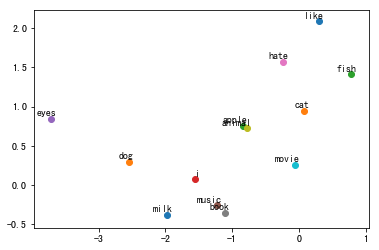

In [13]:
tf.reset_default_graph()

# 3 Words Sentence
sentences = [ "i like dog", "i like cat", "i like animal",
              "dog cat animal", "apple cat dog like", "dog fish milk like",
              "dog cat eyes like", "i like apple", "apple i hate",
              "apple i movie book music like", "cat dog hate", "cat dog like"]

all_words = ' '.join(sentences).split()
word_list = list(set(all_words))
word_num = {w:i for i,w in enumerate(word_list)}

#parameters
embedding_size = 2
batch_size = 20
num_sampled = 10 # for negative sampling, less than batch_size
vocab_size = len(word_num)

def get_random_batch(data,batch_size):
    random_target = []
    random_labels = []
    index = np.random.choice(len(data),batch_size,replace=False)
    
    for i in index:
        random_target.append(data[i][0])
        random_labels.append([data[i][1]])
    return random_target,random_labels

skip_gram = []

for i in range(1,len(all_words)-1):
    target = word_num[all_words[i]]#中心词
    labels = [word_num[all_words[i-1]],word_num[all_words[i+1]]]#存储中心词前后的各一个词
    
    for w in labels:
        skip_gram.append([target,w])

inputs = tf.placeholder(tf.int32,[batch_size])
labels = tf.placeholder(tf.int32,[batch_size,1])

embeddings = tf.Variable(tf.random_normal([vocab_size,embedding_size],-1.0,1.0))
selected_embeddings = tf.nn.embedding_lookup(embeddings,inputs)

nce_wights = tf.Variable(tf.random_normal([vocab_size,embedding_size],-1.0,1.0))
nce_bias = tf.Variable(tf.zeros([vocab_size]))

cost = tf.reduce_mean(tf.nn.nce_loss(nce_wights,nce_bias,labels,selected_embeddings,num_sampled,vocab_size))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

# Training
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    for epoch in range(10000):
        batch_inputs, batch_labels = get_random_batch(skip_gram, batch_size)
        _, loss = sess.run([optimizer, cost], feed_dict={inputs: batch_inputs, labels: batch_labels})

        if (epoch + 1) % 1000 == 0:
            print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    trained_embeddings = embeddings.eval()

for i, label in enumerate(word_num):
    x, y = trained_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()